# Term Deposit Predictive ML Model

## Contents

* About
    * Project Development
    * Problem Definition
    * Objective
* Data
    * Libraries
    * Importing
    * Variables
* Exploratory Data Analysis (EDA)
    * Plotting Objectives
    * Functions
    * Shape and Size
    * Types
    * Unique Values
    * Missing Values
    * Units Conversion
    * Continuous and Categorical Variables
        * Continuous Variables
            * Summary statistics
            * Probability Distribution
            * Making sense of the data
        * Categorical Variables
            * Bar Plots
* Feature Engineering
    * Units Conversion
    * Continuous Variables
        * Feature Scaling - Standardization (or Z-score Normalization)
        * Outliers Detection and Treatment
    * Categorical Variables
        * Label Encoding
* Feature Selection
    * Inferential Statistics and Hypothesis Testing
    * Feature Importance
    * Correlation Matrix Heatmap
* Model Training
* Model Evaluation
* Class Imbalance ???

## About

### Project Development
This project was developed locally with Visual Studio Code and GitHub version control.

Please check this project @ [GitHub page](https://caiocvelasco.github.io/) or @ [GitHub Repository](https://github.com/caiocvelasco/ml-project-bank-term-deposit/blob/4f1bfa72d17cefdfe2a515054f1f2cfffa3c7749/bank-term-deposit-notebook.ipynb).

### Problem Definition

A bank would like to understand the main factors driving customers to subscribe a Term Deposit.

### Objective
Our goal is to build a classifier (supervised machine Learning model) to predict whether customers would subscribe a Term Deposit. In case we find high accuracy in our model, it would imply that the bank marketing department could benefit from an efficient use of available resources by focusing on the "right" customers (given by our _classifier_). Moreover, we want to understand which other factors might also affect customers' decision.

* Recall: Classification Model

    The goal of a classification model is to build a data-driven model that learns an unknown underlying function that maps several input variables, which characterize an item (e.g., bank client, with one labeled output target (e.g., type of bank deposit sell: “failure” or “success”). 
    _[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014_

## Data
Data was already available on a _csv_ format. So I'll skip this section.

### Libraries

In [115]:
# !pip install seaborn pandas matplotlib numpy
import pandas as pd              # for data analysis
import numpy as np               # for scientific computing
import os                        # for file interactions in the user's operating system
import warnings                  # for dealing with warning messages if need be
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt  # for data visualization
import matplotlib as mpl
import seaborn as sns            # for data visualization

### Importing

* [_Brief Note_]   It is important to import only the data we need to save up time and space. However, this dataset already contains the features we need, so I will skip that.
* [_Independence_] This notebook can be downloaded and saved anywhere in your computer (one needs only to change the name of the folder where the CVS files are located).
* [_Automation_]   Any dataset saved in the designated folder will be stored automatically.
* [Stacking]       If there is a need to combine (or stack) multiple CSV files, please read the _extra_ below.

Extra - Multiple CSV files
* If there is a need to stack (or combine) multiple CSV files based on a matching _filename_ pattern, please check one of my [repositories](https://github.com/caiocvelasco/stack-combine-multiple-csv-files/blob/7854a473046e4dc5876bcf8caa69b4b3d16dc7e1/stack-combine-multiple-csv-files.ipynb). There, you'll find a code to perform this task automatically under the following assumption: the stored CSV files have the same features.

In [116]:
# Basic Settings
csv_folder_name = "bank_marketing"  # please, change the folder name where the CSV files are stored **if need be**
notebook_location = "C:\\Users\\caiov\\OneDrive - UCLA IT Services\\Documentos\\DataScience\\Datasets" # set the location where this notebook is saved
csv_folder_path = notebook_location + "\\" + csv_folder_name  # set path for the CSV files
os.chdir(csv_folder_path)                                     # set location of CSV files

# Save cvs data on a pandas dataframe
df = pd.read_csv("bank-full-case.csv", sep = ";", skipinitialspace = True) #skip space after delimiter

# Save a copy of the dataframe
data = df.copy()

# Basic Formatting
data.name = "Bank Term Deposit Dataset" # rename the dataset 
cols = data.columns;                    # create an index list with features names

# Quick overview of a sample from the data
data.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
44049,21,student,single,secondary,no,2488,no,no,cellular,30,jun,258,6,169,3,success,yes
24494,47,technician,married,secondary,no,80,no,yes,cellular,17,nov,74,1,145,1,failure,no
35716,48,management,divorced,tertiary,no,84,yes,no,cellular,8,may,14,5,364,5,failure,no
6468,34,blue-collar,married,secondary,no,-1725,yes,no,unknown,27,may,452,2,-1,0,unknown,no
1755,34,unemployed,divorced,secondary,no,354,yes,no,unknown,9,may,308,1,-1,0,unknown,no


### Variables

Note that so far I have not defined the common terminology used in Machine Learning (e.g.: features, target, etc). For now, we are only presenting the variables present in our dataset.

**Outcome**
* y (_intended outcome_): has the client subscribed a term deposit? (binary:"yes","no")

**Demographics / Client Data**
* age                                        (numeric)
* job:      type of job                      (categorical:admin.','bluecollar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* marital:  marital status                   (categorical:'divorced','married','single'; note: 'divorced' means divorced or widowed)
* education                                  (categorical: 'primary','secondary','tertiary','unknown')
* default:  has credit in default?           (categorical: 'no','yes')
* balance:  average yearly balance, in euros (numeric)
* housing:  has housing loan?                (categorical: 'no','yes')
* loan:     has personal loan?               (categorical: 'no','yes') 

**Related to Current Marketing Campaign**
* contact:  contact communication type                                            (categorical:'cellular','telephone','unknown')
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* day:      last contact day of the month                                         (numeric 1 -31)
* month:    last contact month of year                                            (categorical: 'jan', 'feb','mar', …, 'nov', 'dec')
* duration: last contact duration, in seconds                                     (numeric). 
    Important note: this attribute highly affects the output target (e.g., ifduration = 0 then y = 'no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Related to Previous Marketing Campaigns**
* pdays:    number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client                      (numeric)
* poutcome: outcome of the previous marketing campaign                                                 (categorical: 'failure','other','success','unknown')



## Exploratory Data Analysis (EDA)

### Plotting Objectives
This is a Classification Machine Learning Algorithm, thus we should be able to explore and visualize:
 * Features and their distributions, unidimensionaly
 * How each features is associated with the target varieble, bidimensionally
 * How features are associated among themselves, to get rid of possible redundancies

### Defining Functions for EDA

In [117]:
### ANALYSIS PART ###

# Checking Shape
def data_shape(data):
    print("Dataset shape: " + str(data.shape[0]) + " observations and " + str(data.shape[1]) + " features.")

# Check Size
def data_size(data):
    print("This dataset has a total of: " + str(data.size) + " entries.")

# Check Information
def data_info(data):
    print(data.name)
    print("--------------------------------------")
    data.info()
    print("--------------------------------------")  
    
# Get Unique Values per categorical variable
def unique_values(data):                                             # define a function (output: unique values in the categorical variables)
    for i in cols:                                                # cols is the list of features from this dataset defined in the "Importing the Dataset" section above
        if data[i].dtype == 'O':                                  # check whether features are categorical variables. 'O' stand for object type.
            print('Unique values in', i, 'are', data[i].unique()) # calls function unique() to find get unique values
            print('----------------------------------------------------------------------------------------------------')

# Check for Missing Values
def missing_values(data):
    print('Checking for missing values in the', data.name)
    print('------------------------------------------------------------')
    print(data.isnull().sum())
    print('------------------------------------------------------------')

# Save Data with Continuous Variables only
def save_cont_data(data):
    cont_data = data.select_dtypes(include = 'number')
    return cont_data
    
# Save Data with Categorical Variables only
def save_cat_data(data):
    cat_data = data.select_dtypes(exclude = 'number')
    return cat_data

# IQR Method - Detecting Outliers
def iqr_method(potential_outliers, data_copy): #arg 1 takes list of features with potential outliers, arg2 
    i = 1
    for col in potential_outliers:
        Q1 = data_copy[col].quantile(0.25)
        Q3 = data_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        print(f'column {i}: {data_copy[col].name}\n------------------------')
        print('1st quantile => ',Q1)
        print('3rd quantile => ',Q3)
        print('IQR =>',IQR)

        lower_bound  = Q1-(1.5*IQR)
        print('lower_bound => ' + str(lower_bound))

        upper_bound = Q3+(1.5*IQR)
        print('upper_bound => ' + str(upper_bound))
        print("\n------------------------")
        
        i = i + 1

        data_copy[col][((data_copy[col] < lower_bound) | (data_copy[col] > upper_bound))] = np.nan  # replacing outliers with NaN


### VISUALIZATION PART ###

# Plot Probability Distributions for Continuous Variables only
def pdf_plot_cont(cont_data):
    for i in cont_data:
        ax = sns.displot(cont_data[i])
        plt.show()

# Plot Bar Plots for Categorical Variables only (and order by value counts within them)
def bar_plot_cat(cat_data):
    plt.figure(figsize=(20,4))
    for i in cat_data:
        ax = sns.countplot(y = cat_data[i], order = cat_data[i].value_counts().index)
        plt.show()

# Plot Box Plots for Continuous Variables
def box_plot(potential_outliers, cont_data): # the first argument takes a list of features and the second the dataset
    for i in potential_outliers:
        ax = sns.boxplot(x = cont_data[i], orient = 'h')
        plt.show()


### Shape and Size

In [118]:
# Check Shape and Size
data_shape(data) # calls shape function
data_size(data)  # calls size function


Dataset shape: 45211 observations and 17 features.
This dataset has a total of: 768587 entries.


### Types

In [119]:
# Check Data Type
data_info(data) # calls info function

Bank Term Deposit Dataset
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
----------------------------------

All features have the expected type. 

Notice that all non-null counts are the same, so the dataset does not seem to have missing values of the form N/A. Thus, there is not much to do related to numeric (or continuous) features. However, for categorical variables, it is important to check whether their entries, which are interpreted as _categories_. For that, we will look into _Unique values_.

### Unique Values
Let's take a closer look into categorical variables.

In [120]:
# Check for unique values into caterogical variables

unique_values(data) # calls unique values function

print("Columns with missing values set as 'unknown':")
cols[                       # uses the list of columns 'cols' and subsets it to the condition we want
    (data == 'unknown')     # makes a boolean with True/False 
    .any(axis = 0)          # returns false unless there is at least one element meeting the condition withing a series or along a df axis
].to_list()                 # return a list of the values

Unique values in job are ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
----------------------------------------------------------------------------------------------------
Unique values in marital are ['married' 'single' 'divorced']
----------------------------------------------------------------------------------------------------
Unique values in education are ['tertiary' 'secondary' 'unknown' 'primary']
----------------------------------------------------------------------------------------------------
Unique values in default are ['no' 'yes']
----------------------------------------------------------------------------------------------------
Unique values in housing are ['yes' 'no']
----------------------------------------------------------------------------------------------------
Unique values in loan are ['no' 'yes']
------------------------------------------------------------

['job', 'education', 'contact', 'poutcome']

All categorical features have the expected categories.
However, we do see some 'unknown' values in the data for the following categories: _job, education, contact, and poutcome_. 

This could be interpreted as missing values that were treated by imputation. It would be interest to see how 'unknown' values are related to the variation within the data. We will comment this below.

### Missing Values

In [121]:
# Check for missing values
missing_values(data) # calls missing values function

Checking for missing values in the Bank Term Deposit Dataset
------------------------------------------------------------
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
------------------------------------------------------------


As we noticed, the standard missing value function cannot help us visualize missing data because missing values did not come as N/A, but as 'unknown'. Thus, we have to find ways to deal with the 'unknown' values.

Usually, one of the following is performed to handle missing values:
* Dropping observations or features.
* Imputation via values: filling missing data with some statistic (e.g.: mean, median) or some value (e.g.: 'unknown').
* Imputation via prediction model.

In this dataset, there is no missing values in the N/A format. However, as we just saw above, some missing values are treated as 'unknown' values.
It is important to check whether missing information (in this case, the 'unknown') has any statistically relevant association with the outcome we want to predict. 

However, given the timeframe, I will skip this part.

### Units Conversion

There is no need to convert units in the given features.

### Continuous and Categorical Variables

In [122]:
# Save continuous dataset into a new dataset for later use
cont_data = save_cont_data(data)

# Quick Overview
cont_data.sample(5)

,age,balance,day,duration,campaign,pdays,previous
26161,41,927,20,343,2,-1,0
39179,38,2368,18,241,3,-1,0
33588,31,-186,20,21,5,-1,0
16050,30,676,22,214,1,-1,0
30339,26,440,5,143,1,-1,0


In [123]:
# Save categorical dataset into a new dataset for later use
cat_data = save_cat_data(data)

# Quick Overview
cat_data.sample(5)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
16683,technician,married,secondary,no,yes,yes,cellular,jul,unknown,no
17670,blue-collar,married,primary,no,yes,yes,cellular,jul,unknown,no
42291,blue-collar,single,unknown,no,yes,yes,cellular,nov,success,yes
33906,student,single,tertiary,no,no,no,cellular,apr,unknown,no
11347,housemaid,divorced,primary,no,no,no,unknown,jun,unknown,no


### Continuous Variables

In this section, we will check whether the most important statistics makes sence. We'll check the max and min values. Moreover, we'll look into the summary statistics and check for outliers.

#### Summary Statistics

In [124]:
# Summary Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


#### Probability Distributions

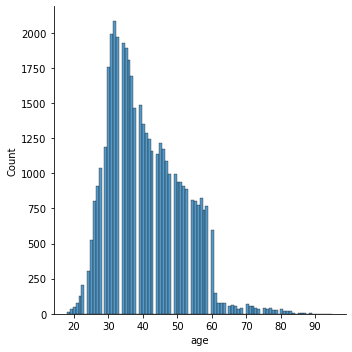

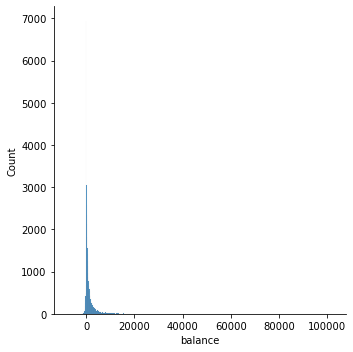

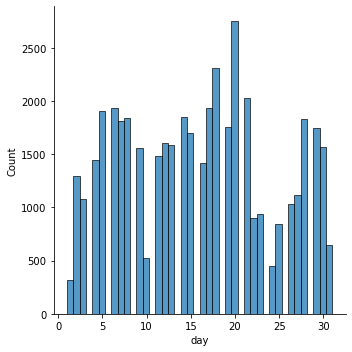

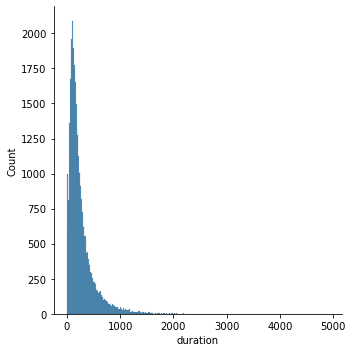

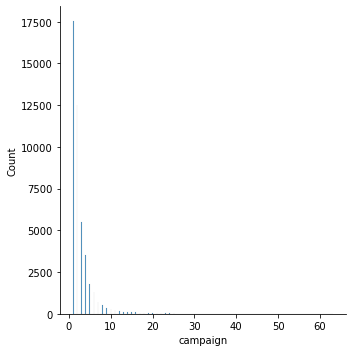

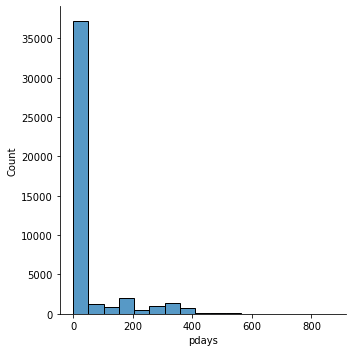

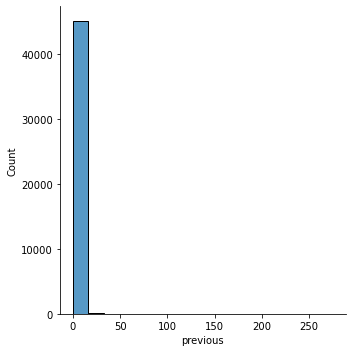

In [125]:
#### Probability Distributions
pdf_plot_cont(cont_data) # calls pdf plots function

Some features are strongly skewed to the right, let's focus on those. They are: **_balance_, _campaign_, _pdays_ and _previous_**.

#### Making Sense of the Data

- [Age] Note that the average age of people in this dataset is roughly 41 years old. The median is 39 years old, which means that half of the people with an open account at this bank is less than 39 and half is older. This makes sense, since we can find both older and younger people with an open banck account. Moreover, the percentile 75th is 48 years old, which means that 75% of the people (the majority) are less than 48 years old. Both the min and max values do make sense, because there can be someone very old (95 years old) and someone just starting their adult life (18 years old).
- [Balance] Note that 75% of the people have less than 1428 euros in their bank account by the end of the year, on average. Both the min and max values do make sense, because there can be someone very rich (100k euros) and someone with a big debt (-8k euros).
- [Day] Everything looks normal for this variable. Note that half of the people we contact last in the first half of the month and the other half in the last half of the month. This could be an interesting feature because maybe some people are more prone to subscribing a term deposit when they are done paying the majority of their household bills.
- [Campaign] Note that the average number of contacts performed during this campaign for a specific client is roughly 3 times. However, we do notice that the max number does not make much sense because it would be very strange that someone was contacted 63 times during a campaign. This makes even more sence when 75% of the people were contacted at most 3 times. _This could also be an outlier and could be affecting some statistics such as the mean._
- [Pdays] Note that the majority of people (75% of them) were not previously contacted. For those 25% who are left, we see an average of 40 days after the client was last contacted from a previous campaign, with a large variation. This variation can make sense since we are looking into a small portion of the data. Someone was last contacted 871 days after the last campaign. _This could also be an outlier and could be affecting some statistics such as the mean._
- [Previous] Note that before this campaign, the majority of people were not contacted. From what is left, less than 1 contact was performed on average per client. Someone was contacted 275 times before this campaign and this seems odd. _This could also be an outlier and could be affecting some statistics such as the mean._

### Categorical Variables

#### Box Plots

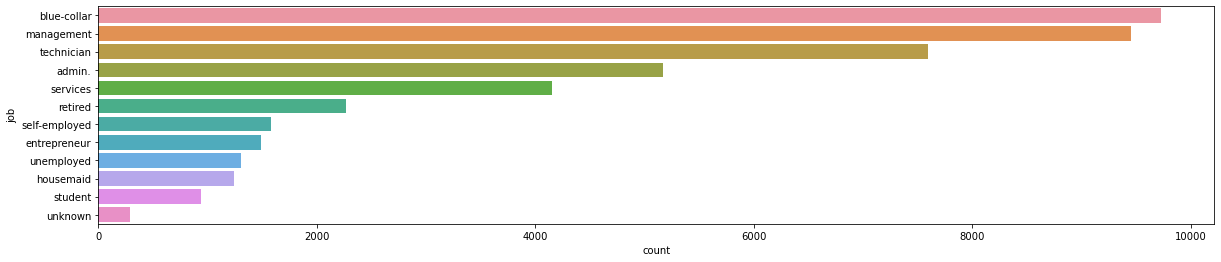

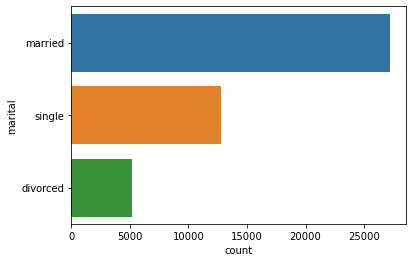

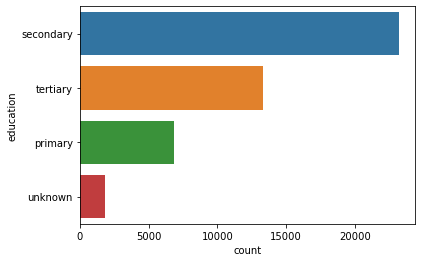

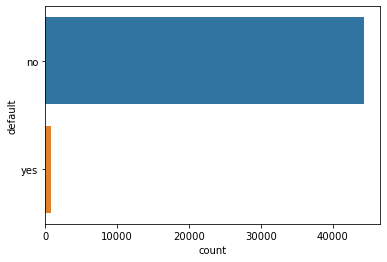

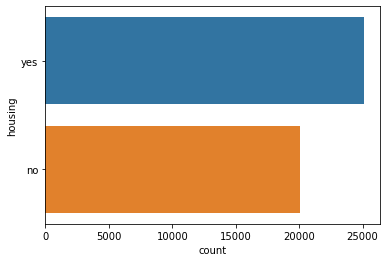

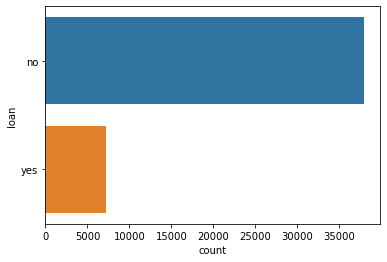

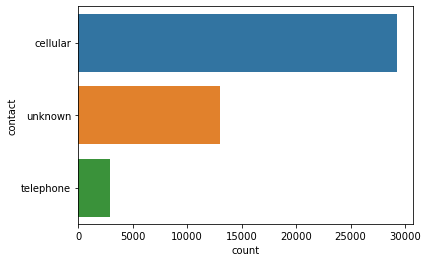

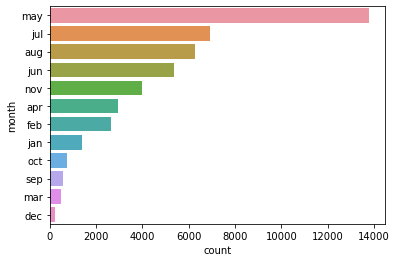

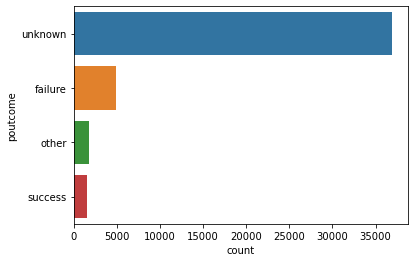

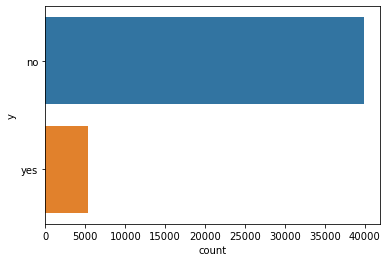

In [126]:
# Bar Plots for Categorical Variables
bar_plot_cat(cat_data)

Note that 'unknown' values are present for features _poutcome_, _contact_, _education_, and _job_.

As mentioned before, some missing values are treated as 'unknown' values. It is important to check whether missing information (in this case, the 'unknown') has any statistically relevant association with the outcome we want to predict.

However, given the timeframe, I will skip this part.



## Feature Engineering
Feature engineering is the process of selecting and transforming variables/features in the context of a Predictive ML Model.

-> check: https://www.freecodecamp.org/news/feature-engineering-and-feature-selection-for-beginners/

### Units Conversion

### Continuous Variables

#### Outliers detection and treatment

Outliers can be found due to variation within the data (i.e., due to an unexpected large variance in a feature) or due to mistakes. Both cases can be dealt with. Let's start looking at the probability distribution of those features and look at their skewness to evaluate possible candidate features for outliers.

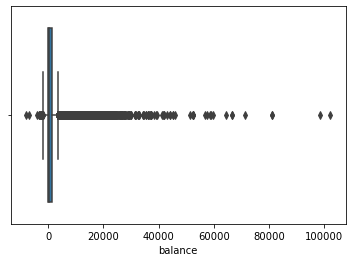

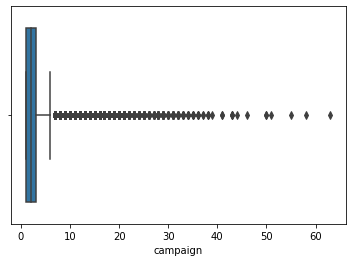

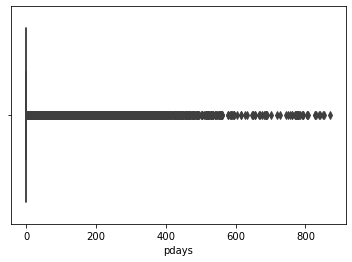

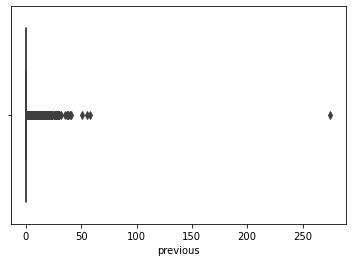

In [127]:
# Define Candidate Features for Outliers
potential_outliers = ['balance','campaign','pdays','previous']

# Boxplots
box_plot(potential_outliers, cont_data)

There are clearly some outliers in these features. We need to handle those. For that, let's use the Interquartile Range (IQR) Method.

Notice that because the right skewedness was the basis for outlier detection, I decided to only use the **upper bound** as a threshold when eliminating outliers.

Moreover, instead of dropping observations, I decided to replace them with NaN values (i.e., the default missing value marker on pandas).

**Important Notes**
* For the _previous_ feature: I decided to first get rid of the max value, which is clearly a strong outlier. Then, I will proceed with the IQR method.
* For the _pdays_ feature, -1 means that the client was not contacted previous to this campaign. pdays means the number of days that passed by after the client was last contacted from a previous campaign. The IQR method will not be interesting for this variable because even though 75% of the data have not been contacted previous to this campaign, there is still potentially interesting hidden information for those who were contacted (25% of the data accounts for roughly 11k people) and it would be interesting to know whether having been contacted has any statistically relevant association with subscribing a term deposit.

All outliers are marked in the respective features as NaN. This serves both to quickly assessing the summary statistics (which drop out NaN in its analysis) and also for handling outliers. There was no NaN values before this, so there won't be any misunderstanding with original ones.

In [128]:
# Save another copy of the dataframe
data_copy = data.copy()

# IQR Method - Detecting Outliers
new_potential_outliers = potential_outliers
new_potential_outliers.remove('balance') # remove 'balance' because it is not unlikely that someone has a lot of money in their bank account

iqr_method(new_potential_outliers, data_copy) #calls the IQR function


column 1: campaign
------------------------
1st quantile =>  1.0
3rd quantile =>  3.0
IQR => 2.0
lower_bound => -2.0
upper_bound => 6.0

------------------------
column 2: pdays
------------------------
1st quantile =>  -1.0
3rd quantile =>  -1.0
IQR => 0.0
lower_bound => -1.0
upper_bound => -1.0

------------------------
column 3: previous
------------------------
1st quantile =>  0.0
3rd quantile =>  0.0
IQR => 0.0
lower_bound => 0.0
upper_bound => 0.0

------------------------


In [129]:
# Check new dataset with NaN as outliers
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,42147.0,2.129950,1.315842,1.0,1.0,2.0,3.0,6.0
pdays,36954.0,-1.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0
previous,36954.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [130]:
# Check and count outliers

print("The features in which outliers were replaced by NaN and their respective % are:")
total = data_copy[potential_outliers].select_dtypes(include = 'number').isnull().sum().sort_values(ascending = False)
percent = data_copy[potential_outliers].select_dtypes(include = 'number').isnull().sum()/data_copy[potential_outliers].select_dtypes(include = 'number').isnull().count()
outliers = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
outliers

The features in which outliers were replaced by NaN and their respective % are:


,Total,Percent
pdays,8257,0.182633
previous,8257,0.182633
campaign,3064,0.067771


I decided to proceed with replacing outliers by relevant statistics proceeding with basic imputation method:
* For campaign, and previous: replace outliers by **Median** because of the presence of skewness
* For pdays: because it is highly skewed and the majority of clients were not contacted before ('-1'), it would be good to replace outliers with the mode '-1'.

In [131]:
# Treating Outliers

relevant_outliers = ['campaign', 'previous']

# mean
for col in relevant_outliers:
    data_copy[col].fillna(data_copy[col].median(), inplace = True)

# mode
data_copy['pdays'].fillna(data_copy['pdays'].mode()[0], inplace = True)

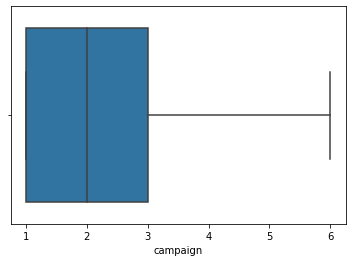

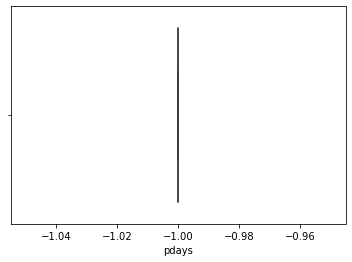

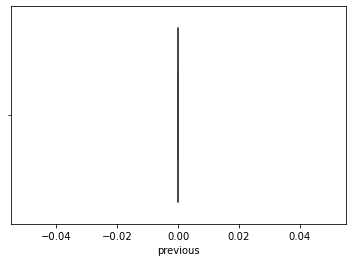

In [132]:
# Check whether outiers were removed

# Boxplots

box_plot(potential_outliers, data_copy)

Note that after we removed the potential outliers, we were left only with people who were not contacted before this campaign (maximum value of _previous_ = 0).
Moreover, since _pdays_ would show number of days that passed by after the client was last contacted from a previous campaign, it makes sense to only be left with the value -1, which indicates people who were not previously contacted.
 
Now let's plot the data again, but for the only relevant features left: _campaign_. We will avoid using previous and pdays because it does not seem to have much relevant information of the variation in the data.

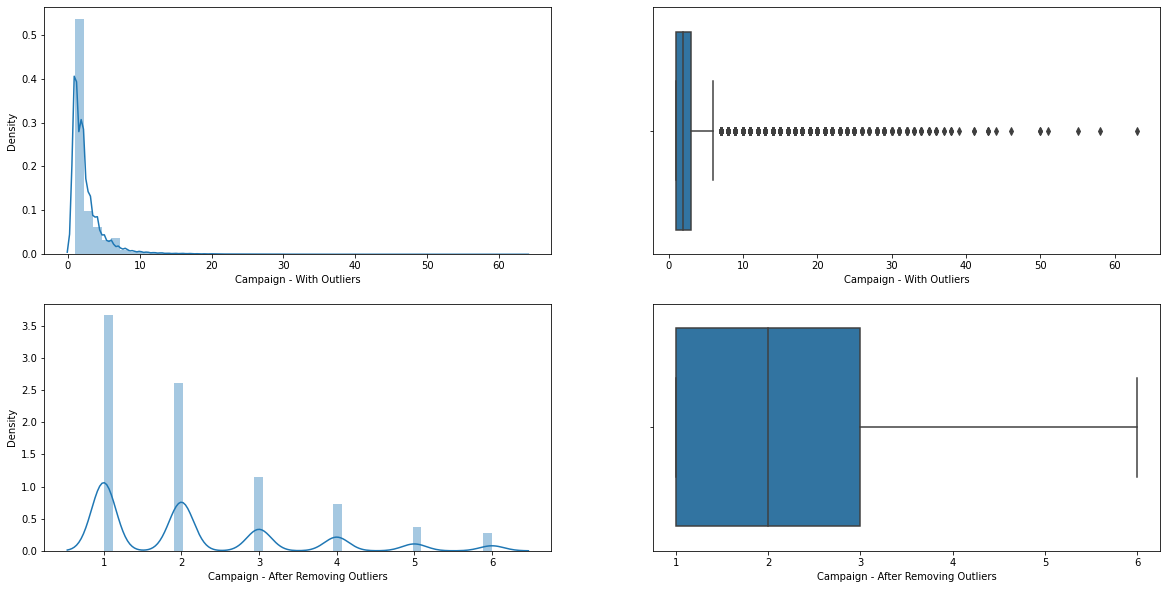

In [134]:
# Boxplots & Probability Distribution

plt.figure(figsize = (20,10))

plt.subplot(2, 2, 1) # 2: both plots on 2 rows / 2: divide both plots into 2 columns / 1: controls the first plot
sns.distplot(data['campaign'])
plt.xlabel('Campaign - With Outliers')

plt.subplot(2, 2, 2) # 2: both plots on 2 rows / 2: divide both plots into 2 columns / 2: controls the second plot
sns.boxplot(x = data['campaign'], orient = 'h')
plt.xlabel('Campaign - With Outliers')

plt.subplot(2, 2, 3) # 2: both plots on 2 rows / 2: divide both plots into 2 columns / 3: controls the third plot
sns.distplot(no_outliers_data['campaign'])
plt.xlabel('Campaign - After Removing Outliers')

plt.subplot(2, 2, 4) # 2: both plots on 2 rows / 2: divide both plots into 2 columns / 4: controls the fourth plot
sns.boxplot(x = no_outliers_data['campaign'], orient = 'h')
plt.xlabel('Campaign - After Removing Outliers')

plt.show()

Notice that we have a Multimodal Distribution for both the feature campaign and balance.

For the feature _campaign_, the average number of contacts perform during this campaign was 2. Moreover, 75% of the people were contact at most 3 times during this campaign.

#### Feature Scaling - Standardization (or Z-score Normalization)

It is best practice to bring all (continuous) features to the same scale.

A reason for feature scaling is to speed up convergence in the gradient descent process.

Another reason is that it makes it easier for visualization because every transformed feature will be under the same range of values.

Notes: 
* A Standard scaler assumes that the distribution within each feature follows a normal (gaussian) distribution.
* It is better to standardize variables **after (and not before)** removing outliers because when doing the latter, data can become even more normally distributed, an assumption required in standardization.

### Categorical Variables

#### Label Encoding

## Feature Selection

### Inferential Statistics and Hypothesis Testing

-> check: https://www.coursera.org/learn/ibm-exploratory-data-analysis-for-machine-learning#syllabus

### Feature Importance

### Correlation Matrix Heatmap

In [ ]:
# Heatmap = Correlation among features

# function to set figure parameters
def fig_att(figure, title, titlex, titley, size, sizexy, weight):
    figure.set_title(title,   size = size,   weight = weight)
    figure.set_xlabel(titlex, size = sizexy, weight = weight)
    figure.set_ylabel(titley, size = sizexy, weight = weight)

plt.figure(figsize = (15,8))
ax = sns.heatmap(no_outliers_data[no_outliers_data.columns.difference(['pdays', 'previous'])].corr(), # use all but omit previous and pdays features
                                         annot = True, fmt = '.1g', vmin = -1, vmax = 1, center = 0)

fig_att(ax, "Heatmap - Correlation among Features", "Features", "Features", 35, 25, "bold")

plt.show()

### Model Training

### Model Evaluation

### Class Imbalance